In [ ]:
# Install kaggle library
!pip install -q kaggle


In [ ]:
# Upload kaggle.json from your Downloads
from google.colab import files
files.upload()   # choose kaggle.json when dialog appears

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amanpaudelaman","key":"81f097d37040a5b18103f10dbf58efef"}'}

In [ ]:
# Put kaggle.json in the right folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 849MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

In [ ]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake['label'] = 0
true['label'] = 1

In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
# Combine & shuffle
df = pd.concat([fake, true], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [ ]:
# Merge title + text
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')
df['full_text'] = (df['title'] + ' ' + df['text']).str.strip()


In [ ]:
df

,title,text,subject,date,label,full_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0,Ben Stein Calls Out 9th Circuit Court: Committ...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1,Trump drops Steve Bannon from National Securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1,Puerto Rico expects U.S. to lift Jones Act shi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0,OOPS: Trump Just Accidentally Confirmed He Lea...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1,Donald Trump heads for Scotland to reopen a go...
...,...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1,PM May seeks to ease Japan's Brexit fears duri...
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1,Merkel: Difficult German coalition talks can r...
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0,Trump Stole An Idea From North Korean Propagan...


In [ ]:
print(df['label'].value_counts())


label
0    23481
1    21417
Name: count, dtype: int64


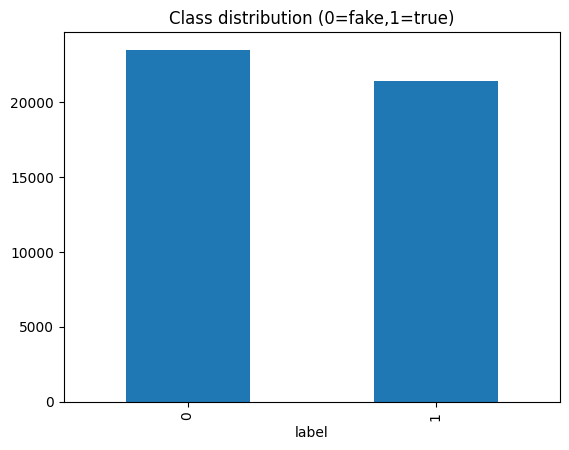

In [ ]:
# Quick plots
df['label'].value_counts().plot(kind='bar', title='Class distribution (0=fake,1=true)')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

# Get a set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Convert to lowercase
  text = text.lower()
  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)
  # Remove stopwords
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

# Apply the cleaning function to the 'full_text' column
df['clean_text'] = df['full_text'].apply(clean_text)

# Display the first few cleaned texts
print(df[['full_text', 'clean_text']].head())

                                           full_text  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3  OOPS: Trump Just Accidentally Confirmed He Lea...   
4  Donald Trump heads for Scotland to reopen a go...   

                                          clean_text  
0  ben stein calls 9th circuit court committed co...  
1  trump drops steve bannon national security cou...  
2  puerto rico expects us lift jones act shipping...  
3  oops trump accidentally confirmed leaked israe...  
4  donald trump heads scotland reopen golf resort...  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Use top 5000 features

# Fit the vectorizer on the training data and transform both sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (35918, 5000)
Shape of X_test_tfidf: (8980, 5000)


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Initialize the model
pac_model = PassiveAggressiveClassifier(max_iter=50)

# Train the model using the TF-IDF vectorized data
pac_model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = pac_model.predict(X_test_tfidf)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.9952

Confusion Matrix:
 [[4689   21]
 [  22 4248]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      0.99      0.99      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model using the same TF-IDF vectorized data
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
print("Naive Bayes Classifier Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier Performance
Accuracy: 0.9346

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4710
           1       0.93      0.93      0.93      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Split the dataframe again since this model uses different preprocessing
X_lstm = df['full_text']
y_lstm = df['label']
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Set up tokenizer parameters
vocab_size = 10000  # Number of unique words to consider
embedding_dim = 128
max_length = 500  # Max sequence length
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>' # Out-of-vocabulary token

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_lstm)

# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(X_train_lstm)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test_lstm)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Build the model architecture
model_lstm = Sequential([
    # Input Embedding layer to represent words as dense vectors
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    # LSTM layer to learn sequential patterns
    Bidirectional(LSTM(64)), # Using Bidirectional LSTM for better context capture
    # Final Dense layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
num_epochs = 5
history = model_lstm.fit(padded_train_sequences, y_train_lstm,
                          epochs=num_epochs,
                          validation_data=(padded_test_sequences, y_test_lstm),
                          callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 657s 582ms/step - accuracy: 0.9578 - loss: 0.0981 - val_accuracy: 0.9988 - val_loss: 0.0074
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 660s 588ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9981 - val_loss: 0.0081
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 679s 585ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9984 - val_loss: 0.0075


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Predict probabilities on the test set
y_pred_probs = model_lstm.predict(padded_test_sequences)
# Convert probabilities to binary class predictions (0 or 1)
y_pred_lstm = (y_pred_probs > 0.5).astype(np.int32)

# Evaluate the LSTM model
print("LSTM Model Performance")
print(f"Accuracy: {accuracy_score(y_test_lstm, y_pred_lstm):.4f}\n")
print("Classification Report:\n", classification_report(y_test_lstm, y_pred_lstm))

281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 127ms/step
LSTM Model Performance
Accuracy: 0.9984

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

